### Forecasting Vehicle Stocks until 2050

#### 1. Vehicle Retirement Curve
To estimate the age of vehicles and how many are retired each year after being newly registered, a retirement curve needs to be created. This can be achieved by analyzing the [VEH1111](https://www.gov.uk/government/statistical-data-sets/vehicle-licensing-statistics-data-tables) data from the Driver and Vehicle Licensing Agency(DVLA), which displays the numbers of licensed vehicles divided by registered year, fuel type, and body type. The data also includes information on how many cars are left annually compared to the registered year.

To simulate diffusions from 2025 to 2050, continuous values from at least 25 years are required. Given that a vehicle's lifespan varies depending on its fuel and body type, this study will utilize data for diesel, petrol, and other cars from 1993 to 2020 in VEH1111. To represent the retirement curves, the actual numbers will be converted to percentages, as shown below.

Note: For the purpose of this study, it is assumed that all autonomous vehicles are battery-electric, based on prior research.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

retirement=pd.read_csv('data/retirement.csv')

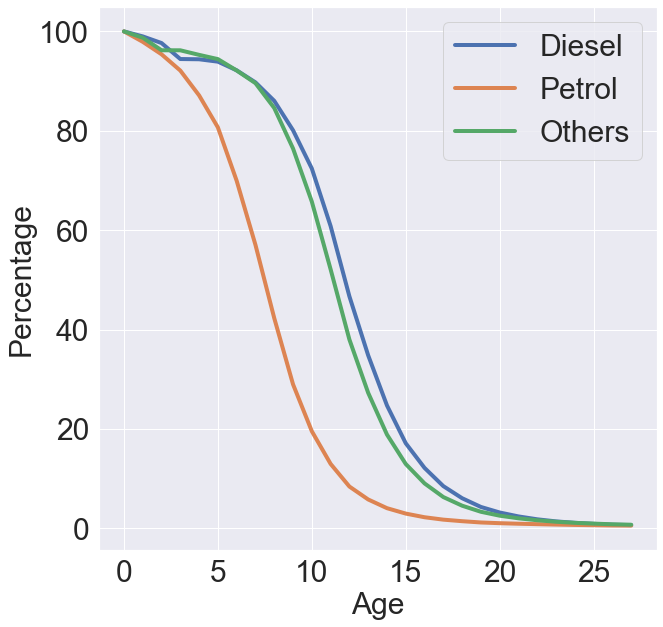

In [2]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})

g=sns.lineplot(x="age", y="diesel", data=retirement,linewidth = 4)
g=sns.lineplot(x="age", y="petrol", data=retirement,linewidth = 4)
g=sns.lineplot(x="age", y="others", data=retirement,linewidth = 4)
plt.xlabel( "Age", fontsize = 30)
plt.ylabel("Percentage", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

plt.legend(['Diesel', 'Petrol','Others'],loc='upper right',fontsize = 30)

plt.show()

#### 2. Predicting Vehicle Stock
The retirement curve is used to forecast future vehicle stocks by analyzing [VEH1153](https://www.gov.uk/government/statistical-data-sets/vehicle-licensing-statistics-data-tables), which provides information on the number of licensed vehicles by body and fuel type. VEH1153 encompasses a wider range of fuel types, including hybrid and electric vehicles, compared to VEH1111. Hence, this study focuses on quantifying future vehicle stocks by fuel type.
 
Prior to measuring vehicle stocks, it is crucial to take into account the UK's transport policy. The government has declared a ban on the sale of petrol and diesel vehicles from 2030 onwards to tackle climate change. From 2030 to 2035, sales of PHEV and HEV will still be permitted but will also be banned after 2035. As a result, new diesel, petrol, PHEV, and HEV vehicles should not be included in stock estimations after their respective ban dates. Moreover, in the absence of autonomous vehicles, BEVs are projected to dominate the market.
 
Although there may be resistance to the policy, this study does not consider it, as it falls beyond the scope of the research to assess the potential effects of resistance on the policy. Therefore, the first prediction is for the total number of vehicles by fuel, without taking their age into account. The number of petrol and diesel vehicles is expected to decrease gradually from 2021 to 2029, while other electric vehicles will increase to meet demand. PHEV and HEV are expected to decrease after 2025 in anticipation of the 2035 ban, while the number of BEVs will continue to rise to dominate the market.
 
Tables show the estimated number of registered vehicles by fuel type for each year, and the retirement curves are used to estimate vehicle stocks. The majority of vehicle stocks are BEVs, and it is important to note that old petrol, diesel, PHEV, and HEV vehicles will still be in use even after the ban on sales. This estimation is referred to as the "Business As Usual (BAU) Scenario."

In [3]:
# read stock data
stock_final=pd.read_csv('data/stock_final.csv')
#convert to million
stock_final[["petrol","diesel", "HEV", "BEV", "PHEV"]]=stock_final[["petrol","diesel", "HEV", "BEV", "PHEV"]]/1000000

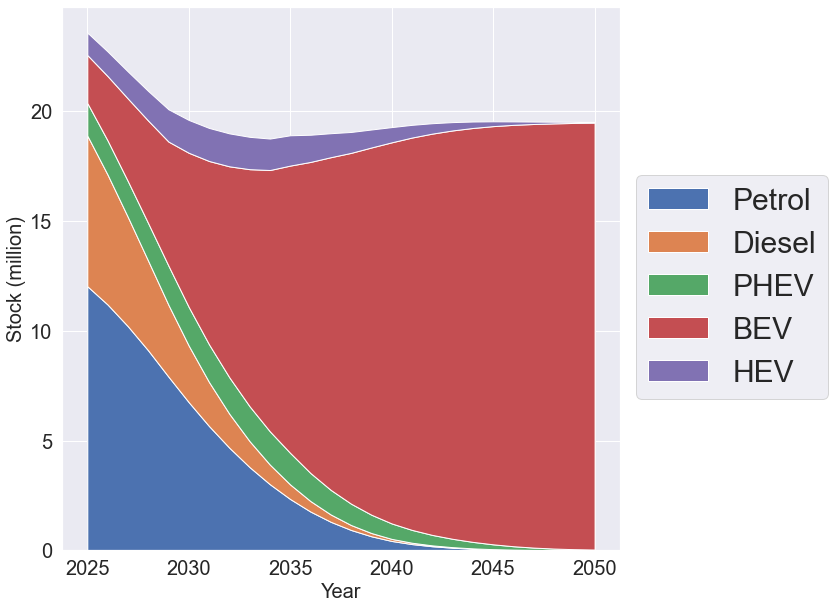

In [4]:
#BAU scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})

g=plt.stackplot(stock_final.year,stock_final.petrol, stock_final.diesel,stock_final.HEV,stock_final.BEV, stock_final.PHEV, labels=["Petrol","Diesel",'PHEV','BEV', "HEV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks( fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(loc='lower right',fontsize = 30,bbox_to_anchor=(1.4, 0.25))


plt.show()

Based on the BAU scenario, it is possible to project the number of AVs. It should be noted that AVs are classified as BEVs, and the number of non-autonomous BEVs is expected to decrease as they are replaced by AVs. Additionally, PHEVs or hHEVs are expected to phase out since it is unlikely that autonomous PHEVs or HEVs will be produced based on UK transport policy.

To estimate the number of AVs, the methodology involves determining the number of BEVs that will be replaced by AVs. The input data for this calculation is based on the penetration rates estimated in a previous study. The projected vehicle stock for each scenario is then presented below.

In [5]:
AV2025_st=pd.read_csv('data/2025_st.csv')
AV2025_ps=pd.read_csv('data/2025_ps.csv')
AV2025_op=pd.read_csv('data/2025_op.csv')
AV2030_st=pd.read_csv('data/2030_st.csv')
AV2030_ps=pd.read_csv('data/2030_ps.csv')
AV2030_op=pd.read_csv('data/2030_op.csv')

#convert to million
AV2025_st[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]=AV2025_st[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]/1000000
AV2025_ps[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]=AV2025_ps[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]/1000000
AV2025_op[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]=AV2025_op[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]/1000000
AV2030_st[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]=AV2030_st[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]/1000000
AV2030_ps[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]=AV2030_ps[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]/1000000
AV2030_op[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]=AV2030_op[["petrol","diesel", "HEV", "BEV", "PHEV","AV"]]/1000000

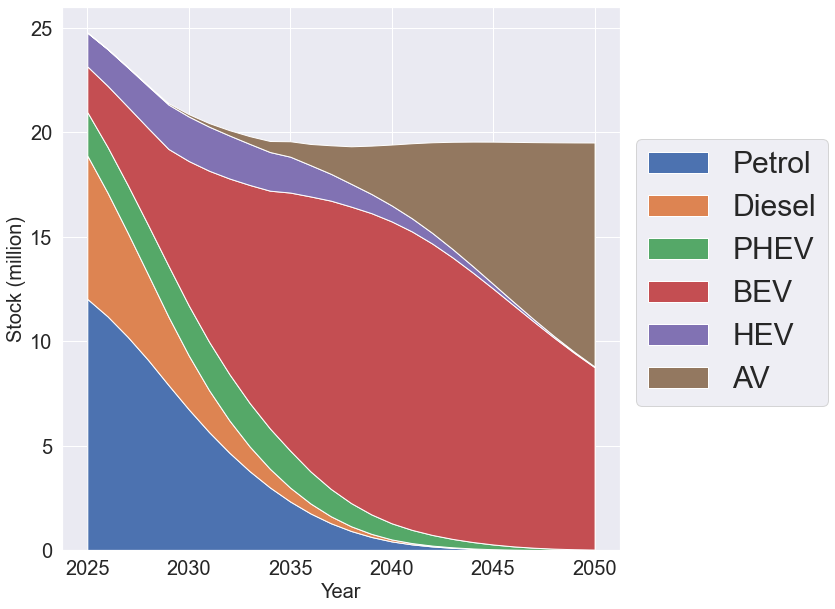

In [6]:
#2025 standard scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})




g=plt.stackplot(AV2025_st.year, AV2025_st.petrol, AV2025_st.diesel,AV2025_st.HEV,AV2025_st.BEV, AV2025_st.PHEV,AV2025_st.AV, labels=[ "Petrol","Diesel",'PHEV','BEV', "HEV","AV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc='upper right',fontsize = 30,bbox_to_anchor=(1.4, 0.785))


plt.show()

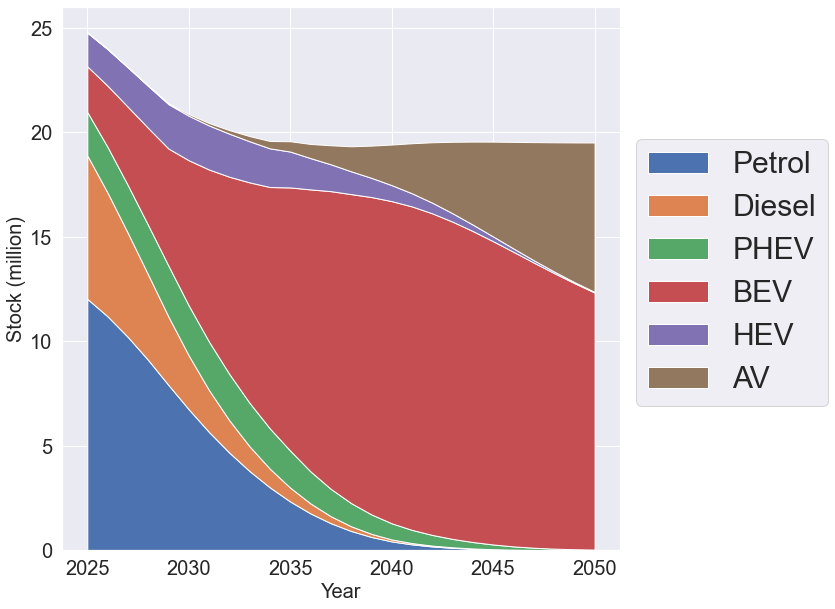

In [7]:
#2025 pessimistic scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})

g=plt.stackplot(AV2025_ps.year, AV2025_ps.petrol, AV2025_ps.diesel,AV2025_ps.HEV,AV2025_ps.BEV, AV2025_ps.PHEV,AV2025_ps.AV, labels=[ "Petrol","Diesel",'PHEV','BEV', "HEV","AV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 0.785), fontsize = 30)


plt.show()

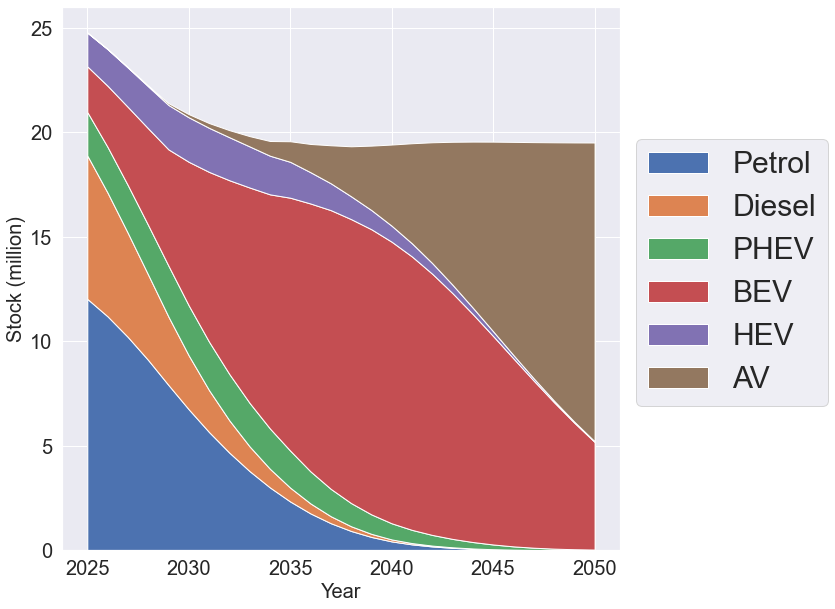

In [8]:
#2025 optimistic scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})

g=plt.stackplot(AV2025_op.year, AV2025_op.petrol, AV2025_op.diesel,AV2025_op.HEV,AV2025_op.BEV, AV2025_op.PHEV,AV2025_op.AV, labels=[ "Petrol","Diesel",'PHEV','BEV', "HEV","AV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 0.785),fontsize = 30)

plt.show()

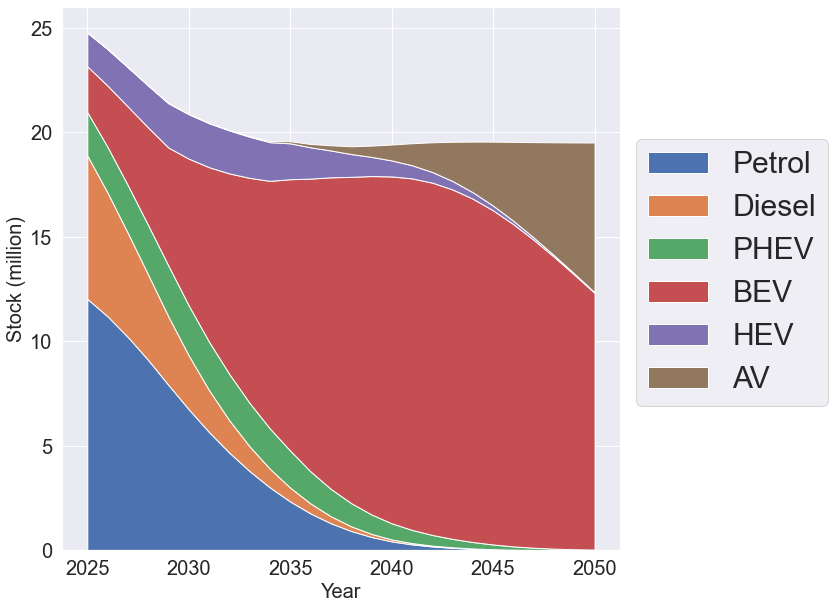

In [9]:
#2030 standard scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})

g=plt.stackplot(AV2030_st.year, AV2030_st.petrol, AV2030_st.diesel,AV2030_st.HEV,AV2030_st.BEV, AV2030_st.PHEV,AV2030_st.AV, labels=[ "Petrol","Diesel",'PHEV','BEV', "HEV","AV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 0.785),fontsize = 30)


plt.show()

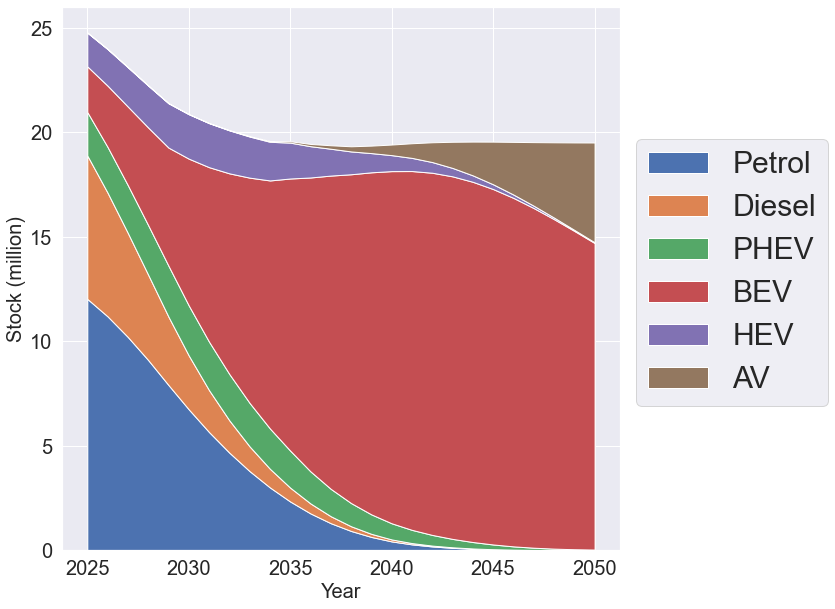

In [10]:
#2030 pessimistic scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})

g=plt.stackplot(AV2030_ps.year, AV2030_ps.petrol, AV2030_ps.diesel,AV2030_ps.HEV,AV2030_ps.BEV, AV2030_ps.PHEV,AV2030_ps.AV, labels=[ "Petrol","Diesel",'PHEV','BEV', "HEV","AV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 0.785),fontsize = 30)


plt.show()

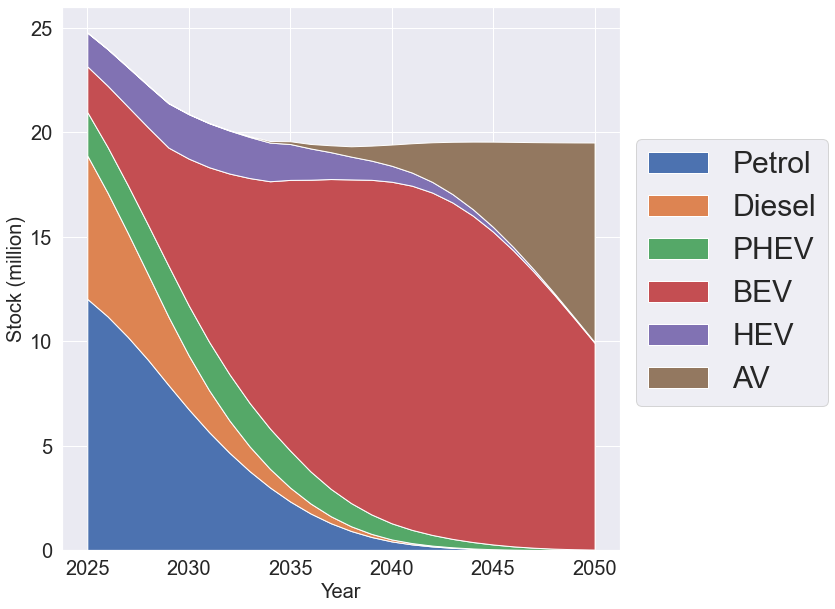

In [11]:
#2030 optimistic scenario
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(rc={'figure.figsize':(10, 10)})




g=plt.stackplot(AV2030_op.year, AV2030_op.petrol, AV2030_op.diesel,AV2030_op.HEV,AV2030_op.BEV, AV2030_op.PHEV,AV2030_op.AV, labels=[ "Petrol","Diesel",'PHEV','BEV', "HEV","AV"] )
plt.xlabel( "Year", fontsize = 20)
plt.ylabel("Stock (million)", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(bbox_to_anchor=(1.4, 0.785),fontsize = 30)


plt.show()